In [46]:
import numpy as np
import matplotlib.pyplot as plt
import glob
plt.rc("font", family=["Helvetica", "Arial"]) # skifter skrifttype
plt.rc("axes", labelsize=22)   # skriftstørrelse af `xlabel` og `ylabel`
plt.rc("xtick", labelsize=22, top=True, direction="out")
plt.rc("ytick", labelsize=22, right=True, direction="out")
plt.rc("axes", titlesize=22)
plt.rc("legend", fontsize=22)
plt.rcParams["figure.figsize"] = (12, 8)

In [30]:
AMVFfiles = np.sort(glob.glob('output/*AMVF.txt'))
iterativefiles = np.sort(glob.glob('output/*iterative.txt'))

AMVF_vtxs = np.loadtxt(AMVFfiles[0])
iterative_vtxs = np.loadtxt(iterativefiles[0])

for AMVFfile in AMVFfiles[1:]:
    # print(AMVFfile)
    vtxs_in_event = np.loadtxt(AMVFfile)
    # print(vtxs_in_event)
    AMVF_vtxs = np.vstack((AMVF_vtxs, vtxs_in_event))
    
for iterativefile in iterativefiles[1:]:
    # print(AMVFfile)
    vtxs_in_event = np.loadtxt(iterativefile)
    # print(vtxs_in_event)
    iterative_vtxs = np.vstack((iterative_vtxs, vtxs_in_event))

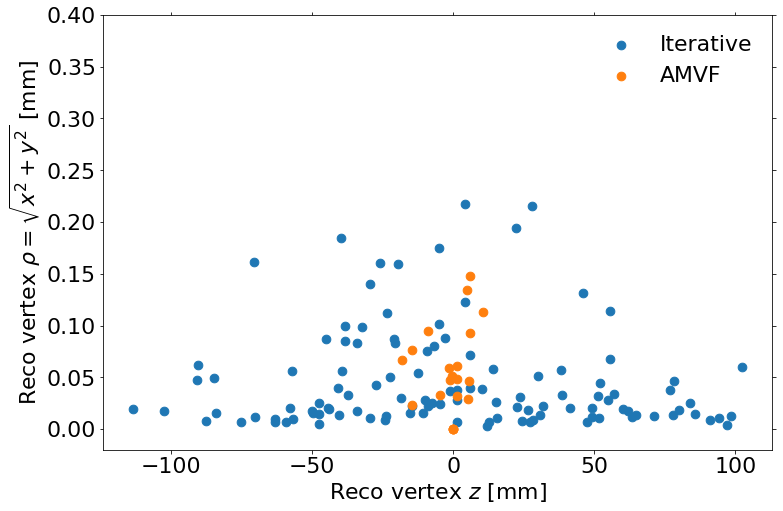

In [68]:
plt.scatter(iterative_vtxs[:,2], (iterative_vtxs[:,0]**2 + iterative_vtxs[:,1]**2)**0.5, s=75, label='Iterative')
plt.scatter(AMVF_vtxs[:,2], (AMVF_vtxs[:,0]**2 + AMVF_vtxs[:,1]**2)**0.5,                s=75, label='AMVF')

plt.xlabel('Reco vertex $z$ [mm]')
plt.ylabel('Reco vertex $\\rho=\\sqrt{x^2 + y^2}$ [mm]')
plt.ylim(-0.02, 0.4)

plt.legend(frameon=False)

Text(0, 0.5, 'Normalized # occurences')

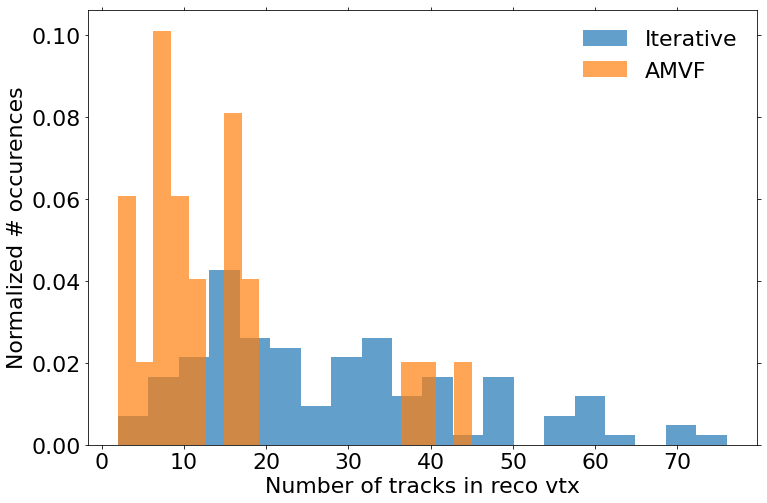

In [62]:
plt.hist(iterative_vtxs[:,4], density=True, bins=20, alpha=0.7, label='Iterative')
plt.hist(AMVF_vtxs[:,4], density=True,      bins=20, alpha=0.7, label='AMVF')

plt.legend(frameon=False)
plt.xlabel('Number of tracks in reco vtx')
plt.ylabel('Normalized # occurences')

Text(0, 0.5, 'Normalized # occurences')

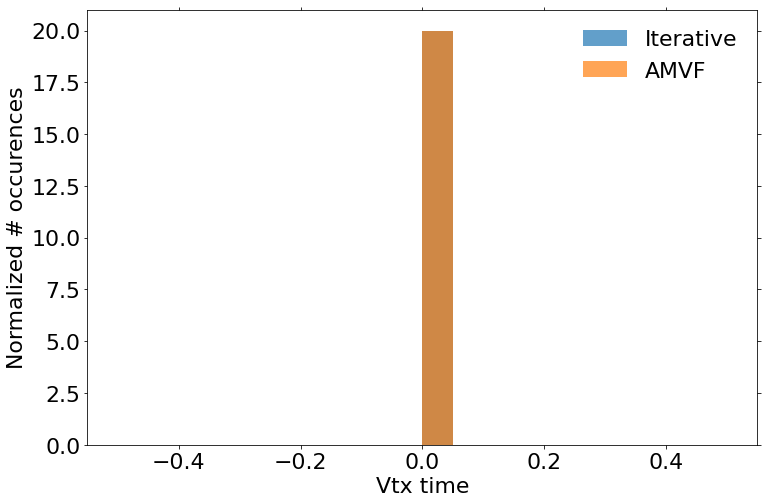

In [69]:
plt.hist(iterative_vtxs[:,3], density=True, bins=20, alpha=0.7, label='Iterative')
plt.hist(AMVF_vtxs[:,3], density=True,      bins=20, alpha=0.7, label='AMVF')

plt.legend(frameon=False)
plt.xlabel('Vtx time')
plt.ylabel('Normalized # occurences')